# Linear Regrssion Template









What we will do in a Linear regression project

1. grab the data using pandas

2. exploratory data analysis but since his artificial data we're not going to focus

3.  then separated the data into X and Y where X is the features and Y is what your're trying to predict.

4. from S-K learned that cross-validation(its model_selection now) import train test split we went ahead and split our data specifying a test size and also specifying a random state.

5. Then we said from S-K learn that linear model import the actual model linear regression we create a linear regression object basically an instantiation of a linear regression model.

6. fit that model to the training set and then we explore the intercept and the coefficient.by formatting the coefficients into a nice data frame in order to read them

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('test.csv')

In [31]:
df.head() #fisrt Section of the dataframe
df.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S


# Exploriatory Data Analys

In [32]:
df.info() # tell you total numer of colums, total number of entries
# Also gives hints on what type of objects are in the data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
df.describe() # in order to get a quick account  of some staticiasatal informatioon

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
df.columns # to refrence what the column names are

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\sanca\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sanca\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


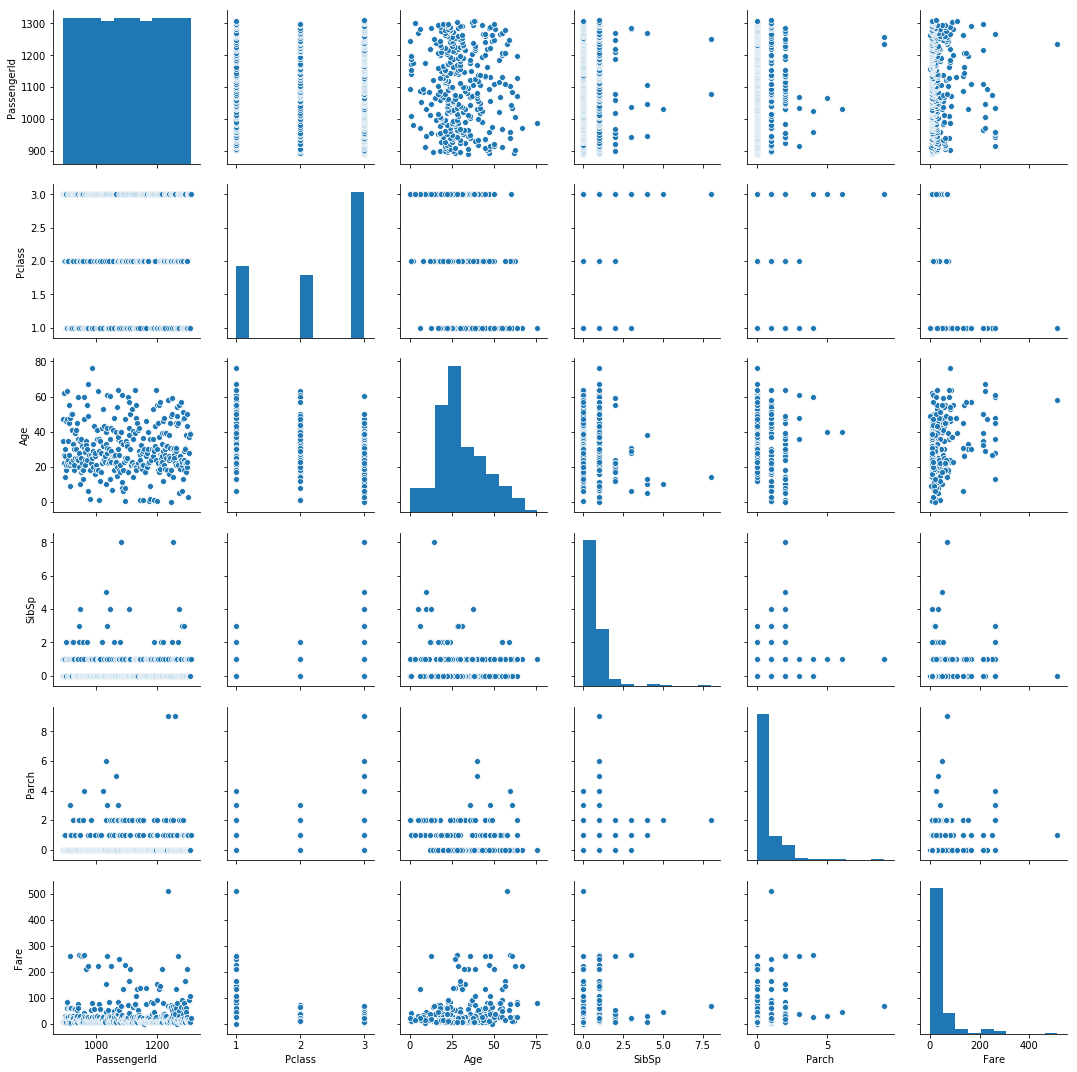

In [35]:
sns.pairplot(df) # creates histograms of all the coloumns, and correlation scatter plots
#

ValueError: cannot convert float NaN to integer

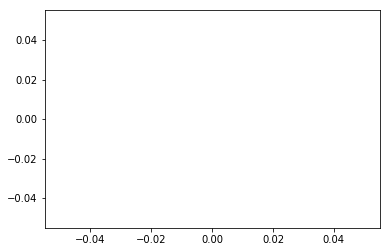

In [36]:

sns.distplot(df['Age'])#you want to check out the distrubtion of your target column
# or what your trying to predict I.E Price of house

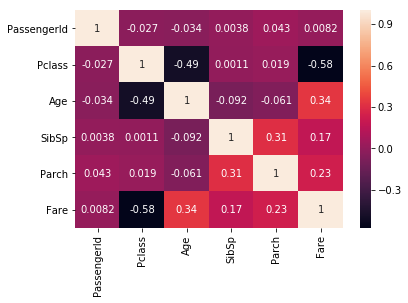

In [12]:
df.corr() # shows the correclation of each of the columns
sns.heatmap(df.corr(),annot=True)

# Training Dataset
Training a linear regression Model

1.The first thing you need to do is split our data into an X-ray that contains the features to train on and a y array with the target variable.(Ex. Price)

2.The next step is to do a train test split on The data.

In [13]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
X = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']]
# These are the features

In [15]:
#y is going to be the traget variable
y = df['Age']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#train_test_split #shift tab copy paste X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# set test size to .4 and set randome state to 101
# test size is the percantage that you  want to be allocated to your test size
# random_state insures a random split in the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression 

In [20]:
lm = LinearRegression() # creates a linear regression object

In [21]:
#lm. and then hit tab to view all the available methods
# what you want to do first is use fit in order to train or fit your model
# on the training data
# next step is to evaluate our model by checking out its coeffients
# and seeing how we can interpret them (print the intercepts)
# the coreficnets are going to relate to each feature in the data set
# then create a dataframe with the coeffiencts in order to orginaze this a little better
#

In [22]:
lm.fit(X_train, y_train) #Only on traing Data

ValueError: could not convert string to float: 'Head, Mr. Christopher'

In [23]:
print(lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [24]:
lm.coef_ #Each of the coeffiecntes relates to the columns in x train

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [25]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [27]:
cdf # here we have a coeffiant for each feature

NameError: name 'cdf' is not defined

# Predictions

In [28]:
predictions = lm.predict(X_test) # you want to pass in feateus the model has never seen
# before

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [29]:
predictions #these are the predictive prices of the house(or any feature you are trying to predict)

NameError: name 'predictions' is not defined

In [34]:
y_test # we know that y_test contains the carrent prices of the house

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

In [30]:
# we wnat to know how off are the prection from the true values!!!
# a scatter plot is a quick way you can visualize the comparison between
# your prdection and the real data, if its  straigh line is accurate
plt.scatter(y_test,predictions)

NameError: name 'predictions' is not defined

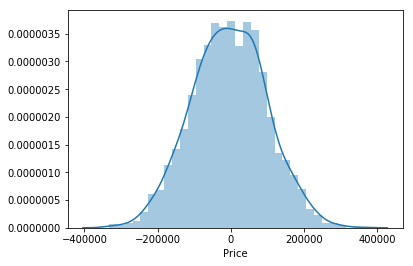

In [36]:
# next lets create a histogram of the distrubution of our residuals
sns.distplot(y_test-predictions)
# the residuals look to be normally distrubtued, that is a good sign
# it typically means that your model was the correct choice for the data


# Regression evaulation metrics
Mean Absolute Error

Mean squared Error

Root Mean Squared Error


Loss Functions, we want to minimize them

In [37]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914948

In [40]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209064

In [41]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.8292229094